In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
%matplotlib inline

In [7]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv")
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [9]:
df["custcat"].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

array([[<Axes: title={'center': 'income'}>]], dtype=object)

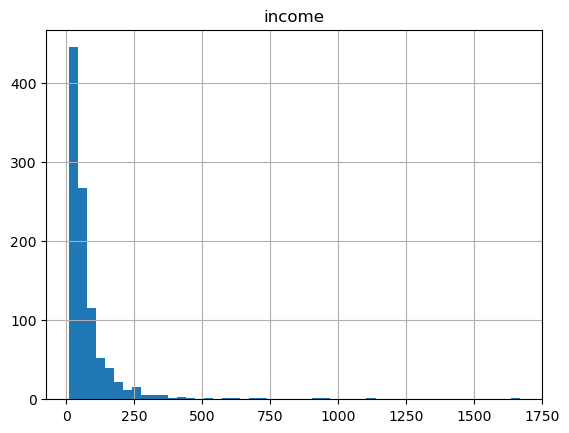

In [10]:
df.hist(column="income",bins=50)

In [13]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [35]:
X= df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed','employ', 'retire', 'gender', 'reside']]  .values
X[0:5]


array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [42]:
y=df["custcat"].values
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

In [43]:
X=preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)
print(X.shape,X_train.shape,X_test.shape,y.shape,y_train.shape,y_test.shape)

(1000, 11) (800, 11) (200, 11) (1000,) (800,) (200,)


In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [93]:
#i will start with k=4
k=9
knn=KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
knn

KNeighborsClassifier(n_neighbors=9)

In [98]:
yhat=knn.predict(X_test)
yhat[0:5]

array([3, 1, 3, 2, 4], dtype=int64)

In [99]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.5025
Test set Accuracy:  0.34


In [106]:
#if we want that which test accuracy value is high we will plot the graph
k=10
test_set_accuracy=[]
for x in range(1,k):
    knn=KNeighborsClassifier(n_neighbors=x).fit(X_train,y_train)
    yhat=knn.predict(X_test)
    yhat[0:5]
    test_set_accuracy.append(metrics.accuracy_score(y_test,yhat))

In [107]:
test_set_accuracy

[0.3, 0.29, 0.315, 0.32, 0.315, 0.31, 0.335, 0.325, 0.34]

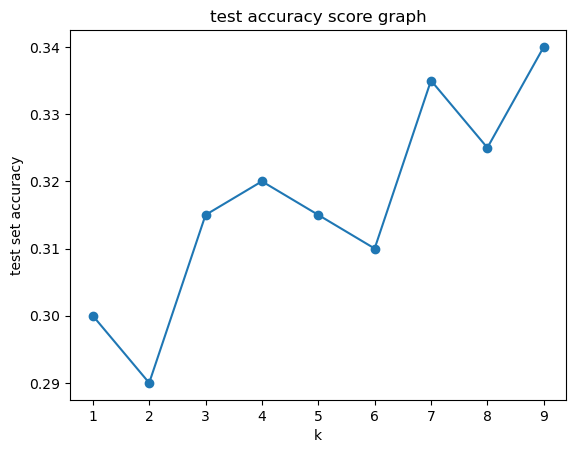

In [108]:
k_values=range(1,10)
plt.plot(k_values,test_set_accuracy,marker="o")
plt.title("test accuracy score graph")
plt.ylabel("test set accuracy")
plt.xlabel("k")
plt.show()